In [2]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn
import csv

import utils

In [3]:
models_folder = 'saved_models'
model_name = '20200826_fxnet'
results_folder = 'saved_results'

In [4]:
all_train_losses = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_train_losses.npy')), allow_pickle=True)
all_train_correct = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_train_correct.npy')), allow_pickle=True)
all_train_results = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_train_results.npy')), allow_pickle=True)

all_val_losses = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_val_losses.npy')), allow_pickle=True)
all_val_correct = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_val_correct.npy')), allow_pickle=True)
all_val_results = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_val_results.npy')), allow_pickle=True)

all_test_losses = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_test_losses.npy')), allow_pickle=True)
all_test_correct = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_test_correct.npy')), allow_pickle=True)
all_test_results = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_test_results.npy')), allow_pickle=True)

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'fx_labels.npy')), allow_pickle=True)

In [5]:
train_set_size = all_train_results.shape[1]
val_set_size = all_val_results.shape[1]
test_set_size = all_test_results.shape[1]

In [6]:
# BEST RESULTS
print('Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

Accuracy:  91.25655206395324
Epoch:  49

Accuracy:  90.38917348421133
Epoch:  41

Accuracy:  90.52541439843415
Epoch:  41



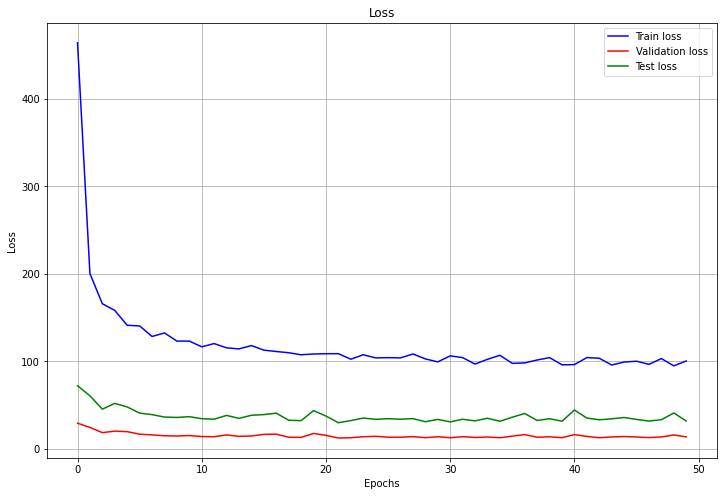

In [30]:
# LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(12,8))
plt.grid(b=None, which='major', axis='both')
plt.plot(epochs, all_train_losses, 'b', label='Train loss')
plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
plt.plot(epochs, all_test_losses, 'g', label='Test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

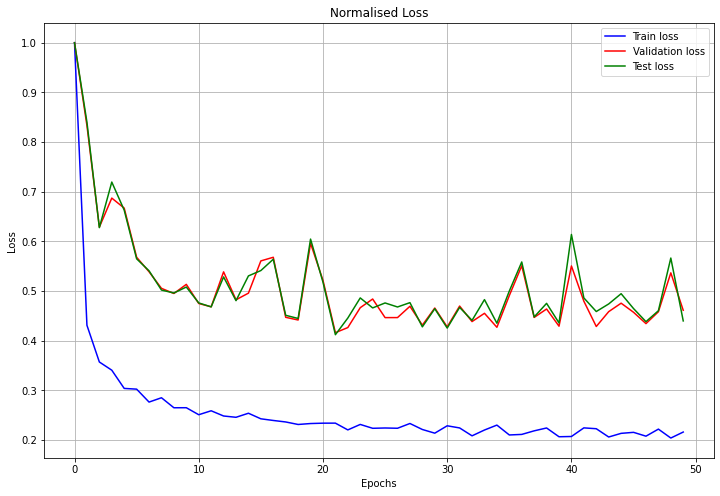

In [31]:
# NORMALISED LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(12,8))
plt.grid(b=None, which='major', axis='both')
plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
plt.title('Normalised Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

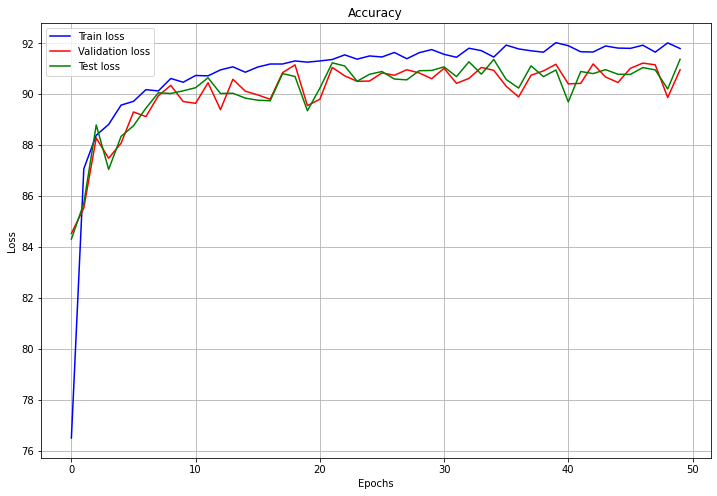

In [32]:
# ACCURACY
all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(12,8))
plt.grid(b=None, which='major', axis='both')
plt.plot(epochs, all_train_perc_correct, 'b', label='Train loss')
plt.plot(epochs, all_val_perc_correct, 'r', label='Validation loss')
plt.plot(epochs, all_test_perc_correct, 'g', label='Test loss')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# CONFUSION MATRICES

# Find best performance epoch based on validation
# Extract results from training and test for that epoch
best_val = 100 * max(all_val_correct) / val_set_size
best_val_idx = np.argmax(all_val_correct)

print("Best Validation Accuracy: ",best_val, "at epoch ", best_val_idx)
print("Training Accuracy: ", 100 * all_train_correct[best_val_idx] / train_set_size)
print("Test Accuracy: ", 100 * all_test_correct[best_val_idx] / test_set_size)

# Confusion matrices for best validation epoch
# extract predictions and targets vectors
train_preds = all_train_results[best_val_idx, :, 2]
train_targets = all_train_results[best_val_idx, :, 3]
val_preds = all_val_results[best_val_idx, :, 2]
val_targets = all_val_results[best_val_idx, :, 3]
test_preds = all_test_results[best_val_idx, :, 2]
test_targets = all_test_results[best_val_idx, :, 3]

# calculate conf. matrix
train_cm = confusion_matrix(train_targets, train_preds)
val_cm = confusion_matrix(val_targets, val_preds)
test_cm = confusion_matrix(test_targets, test_preds)

Best Validation Accuracy:  91.21990004543389 at epoch  46
Training Accuracy:  91.92204776089261
Test Accuracy:  91.04416575790621


Normalized confusion matrix


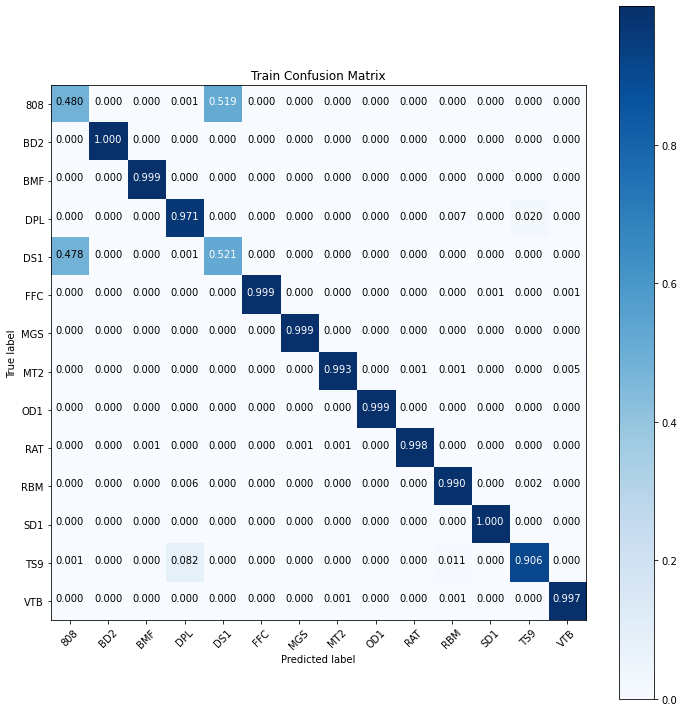

In [34]:
# Train CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(train_cm, fx_labels, normalize=True, title='Train Confusion Matrix')

Normalized confusion matrix


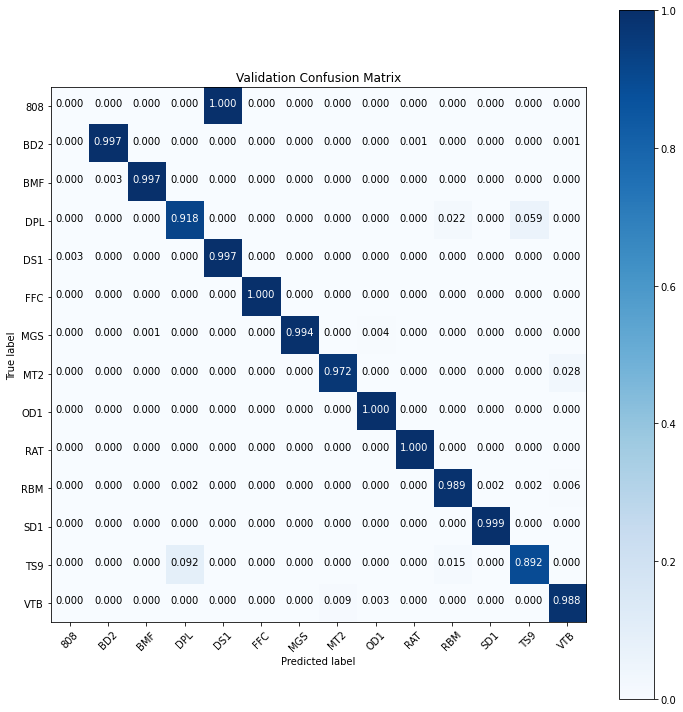

In [35]:
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(val_cm, fx_labels, normalize=True, title='Validation Confusion Matrix')

Normalized confusion matrix


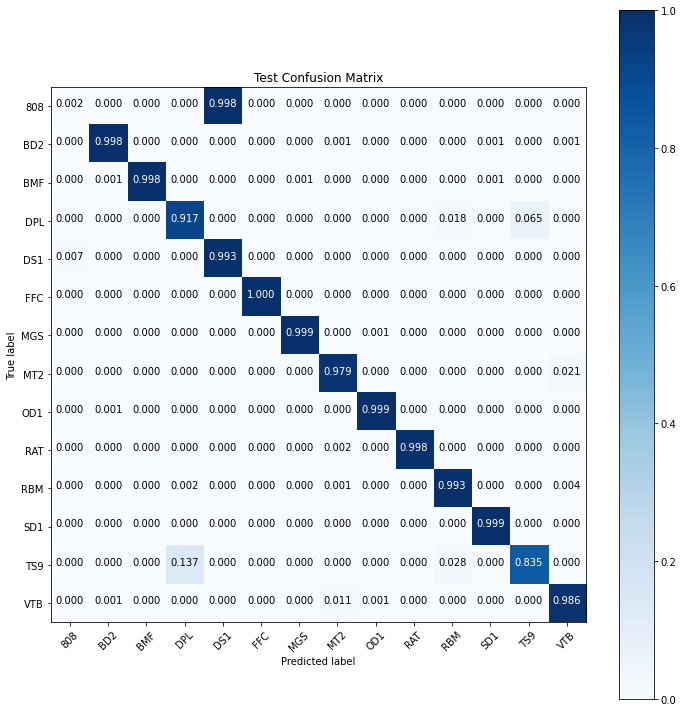

In [36]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_cm, fx_labels, normalize=True, title='Test Confusion Matrix')

In [37]:
# SAVE RESULTS for best epoch

# write train results to csv file
train_results_sorted = all_train_results[best_val_idx].tolist()
for i in range(len(train_results_sorted)):
    train_results_sorted[i][0] = int(train_results_sorted[i][0])
train_results_sorted = sorted(train_results_sorted)
with open('%s/%s/%s' % (results_folder, model_name, 'train_fxnet_results.csv'), mode='w') as file:
    wrt = csv.writer(file)
    wrt.writerow(['index','filename','prediction','label'])
    for row in train_results_sorted:
        wrt.writerow(row)

# write validation results to csv file
val_results_sorted = all_val_results[best_val_idx].tolist()
for i in range(len(val_results_sorted)):
    val_results_sorted[i][0] = int(val_results_sorted[i][0])
val_results_sorted = sorted(val_results_sorted)
with open('%s/%s/%s' % (results_folder, model_name, 'val_fxnet_results.csv'), mode='w') as file:
    wrt = csv.writer(file)
    wrt.writerow(['index','filename','prediction','label'])
    for row in val_results_sorted:
        wrt.writerow(row)

# write test results to csv file
test_results_sorted = all_test_results[best_val_idx].tolist()
for i in range(len(test_results_sorted)):
    test_results_sorted[i][0] = int(test_results_sorted[i][0])
test_results_sorted = sorted(test_results_sorted)
with open('%s/%s/%s' % (results_folder, model_name, 'test_fxnet_results.csv'), mode='w') as file:
    wrt = csv.writer(file)
    wrt.writerow(['index','filename','prediction','label'])
    for row in test_results_sorted:
        wrt.writerow(row)